In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')


from numpy import ones,vstack
from numpy.linalg import lstsq

In [86]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

Coef:  [[0.21682055]]
intercept:  [0.32308489]
CSR5 Equation 1: y =  0.32308488958635717  +  0.21682054944920343  * x


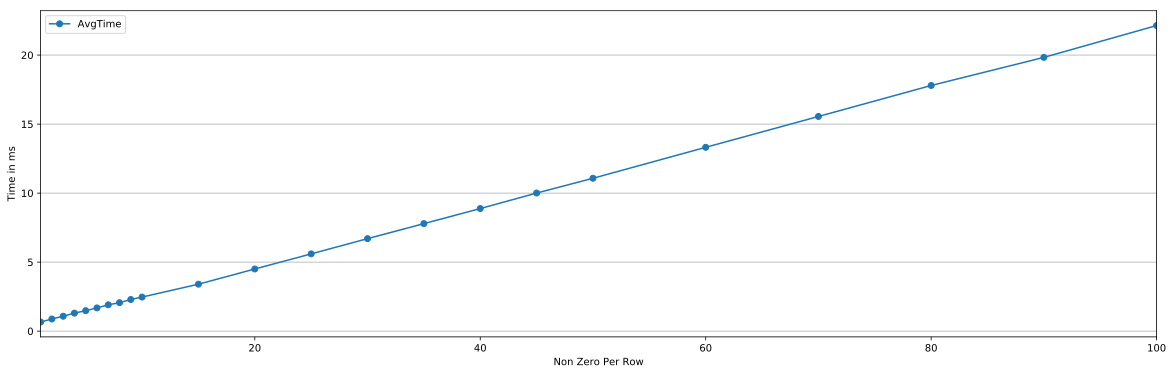

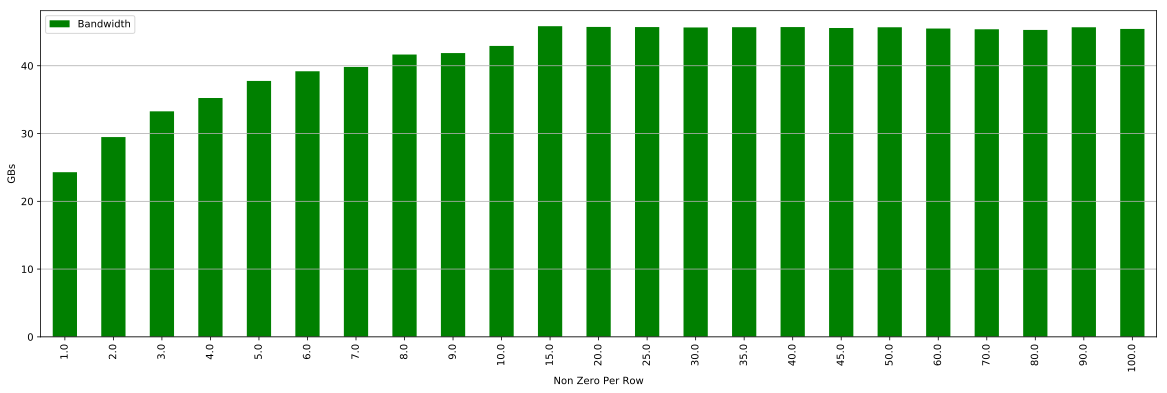

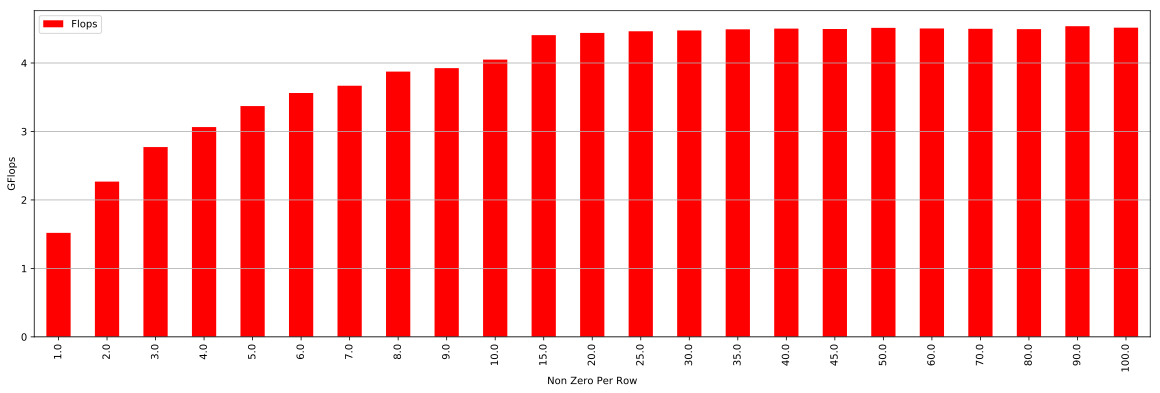

In [87]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR5_MPI_CUDA_SpMV_500KR_1MC.pdf")
data = pd.read_csv("CSR5_cuda/CSR5_SpMV_on_GPU.csv")

data = data[data["ValueType"] == 8]
data = data[data["Partition"] == 416]
data = data[data["M"] == 500000]
data = data[data["N"] == 1000000]
data = data.groupby('NonZeroPerRow').mean()
data = data.reset_index() 
data = data.sort_values(by=["NonZeroElements"])
data = data.reset_index(drop=True) 

#Linear Regression
reg_1 = LinearRegression()
reg_1.fit(data[["NonZeroPerRow"]], data[["AvgTime"]])
print('Coef: ', reg_1.coef_)
print('intercept: ', reg_1.intercept_)
print('CSR5 Equation 1: y = ', reg_1.intercept_[0], ' + ', reg_1.coef_[0][0], ' * x')


f = plt.figure()
ax = data.plot(kind="line", marker='o', x="NonZeroPerRow", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in ms")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')


f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

pdf.close()
# data

Coef:  [[0.00111848]]
intercept:  [-0.02865207]
CSR5 Equation 2: y =  -0.028652073388253374  +  0.0011184828061629659  * x


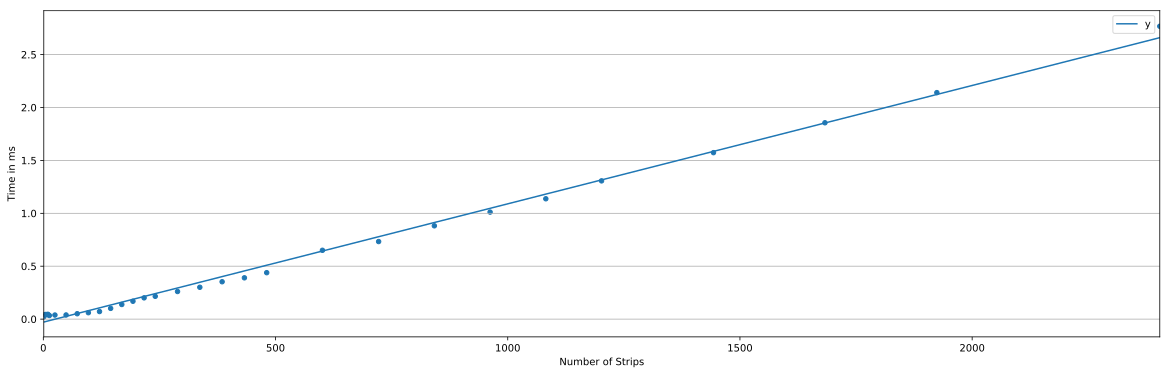

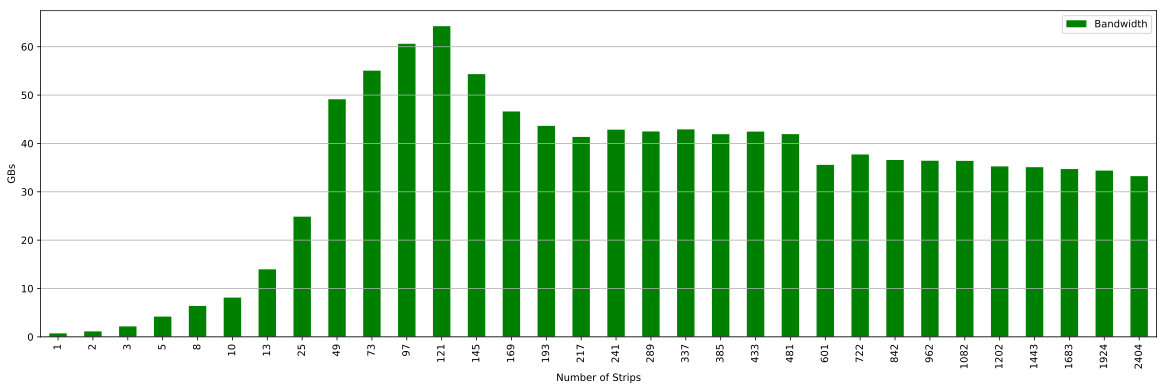

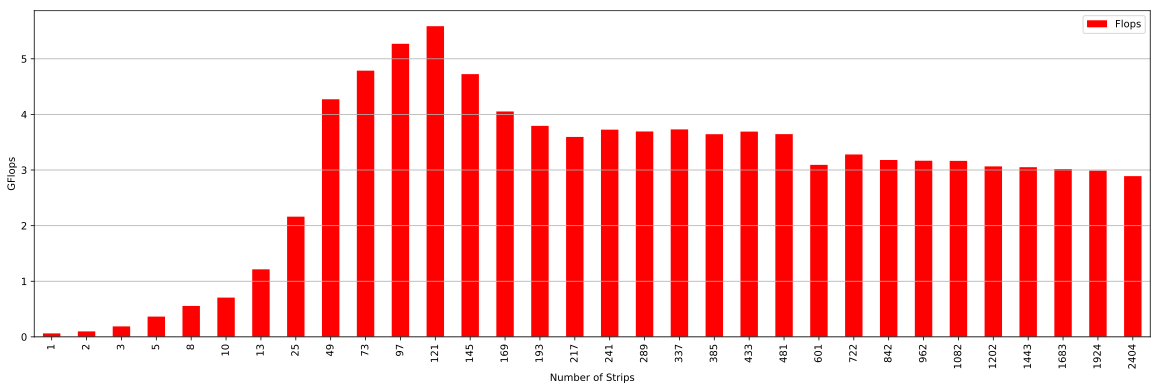

In [88]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR5_MPI_CUDA_SpMV_4NNZ_PER_ROW.pdf")
data = pd.read_csv("CSR5_cuda/CSR5_SpMV_on_GPU.csv")

strips = []
for index, row in data.iterrows():
    strips.append(math.ceil(float(row['M'])/416))

data['Strips'] = strips
data = data[data["ValueType"] == 8]
data = data[data["Partition"] == 416]
data = data[data["NonZeroPerRow"] == 4]
data = data.groupby('Strips').mean()
data = data.reset_index() 
data = data.sort_values(by=["Strips"])
data = data.reset_index(drop=True) 

#Linear Regression
reg_2 = LinearRegression()
reg_2.fit(data[["Strips"]], data[["AvgTime"]])
print('Coef: ', reg_2.coef_)
print('intercept: ', reg_2.intercept_)
print('CSR5 Equation 2: y = ', reg_2.intercept_[0], ' + ', reg_2.coef_[0][0], ' * x')
pr = reg_2.predict(data[["Strips"]])

f = plt.figure()
ax = data.plot(kind="scatter", x="Strips", y="AvgTime", figsize=(20,6))
df = pd.DataFrame()
df['x'] = data["Strips"]
df['y'] = pr
df.plot(kind='line', x='x', y='y', ax=ax)

ax.set_ylabel("Time in ms")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')


f = plt.figure()
ax = data.plot(kind="bar", x="Strips", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="Strips", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

pdf.close()
# data

In [89]:
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")
data = data[data["ValueType"] == 8]
# Synthesis Data
data = data[data["NonZeroPerRow"] == 4]
# data

Coef:  [[0.22339475]]
intercept:  [0.3711376]
CSR Equation 1: y =  0.3711375989625303  +  0.2233947452214031 * x


,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,ValueType
0,1.0,500000,1000000,0.305237,200,500000,57.828736,3.614295,8
1,2.0,500000,1000000,0.510095,200,1000000,53.617314,4.124408,8
2,3.0,500000,1000000,0.661413,200,1500000,57.612383,4.801031,8
3,4.0,500000,1000000,0.800249,200,2000000,59.955839,5.213551,8
4,5.0,500000,1000000,1.244356,200,2500000,47.230175,4.216980,8
5,6.0,500000,1000000,1.434391,200,3000000,47.793907,4.344900,8
6,7.0,500000,1000000,1.815732,200,3500000,43.349198,3.992689,8
7,8.0,500000,1000000,2.002849,200,4000000,44.361653,4.126665,8
8,9.0,500000,1000000,2.233508,200,4500000,44.789475,4.199013,8
9,10.0,500000,1000000,2.369728,200,5000000,46.232184,4.361527,8


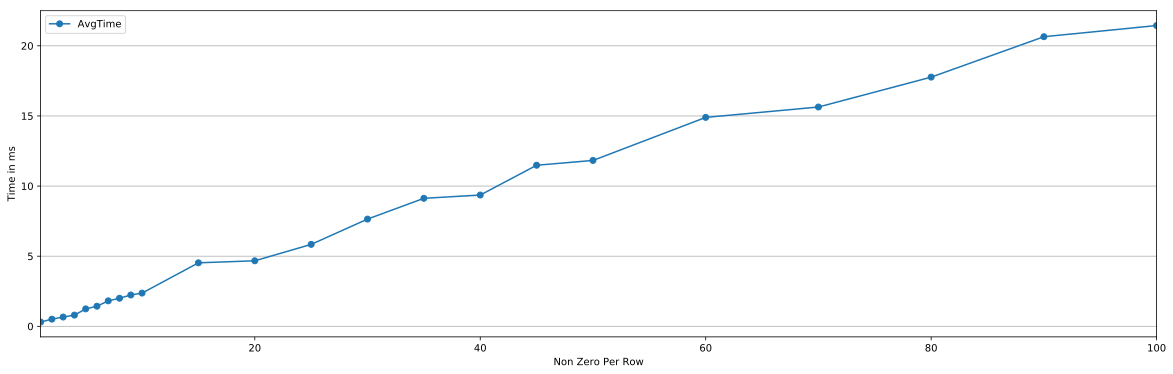

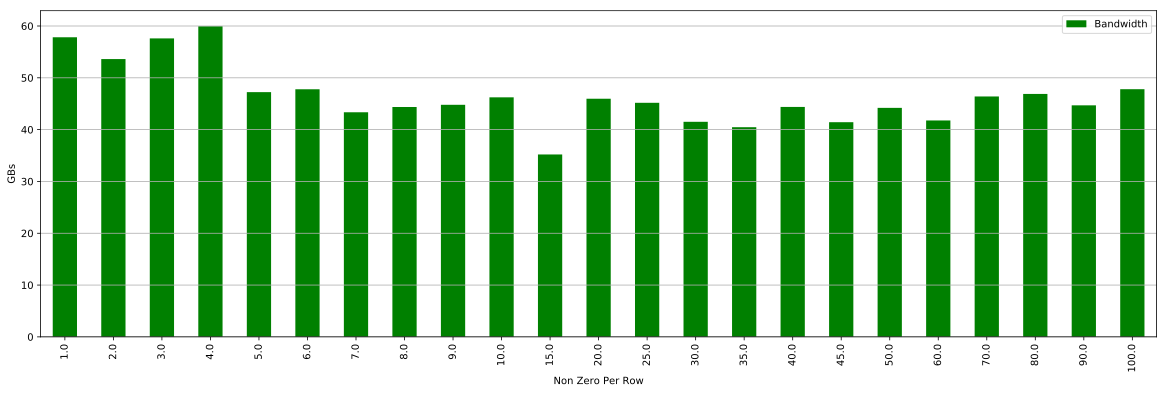

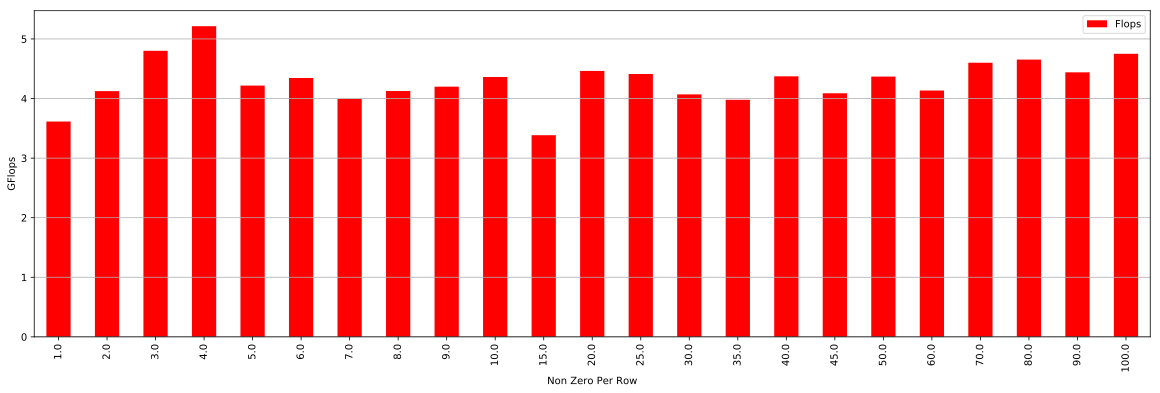

In [90]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_CUDA_SpMV_500KR_1MC.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")

data = data[data["ValueType"] == 8]
# data = data[data["Partition"] == 416]
# Real Data
rdata = data[data["M"] != 500000]
rdata = rdata[rdata["N"] != 1000000]
rdata = rdata.groupby('NonZeroPerRow').mean()
rdata = rdata.reset_index() 
rdata = rdata.sort_values(by=["NonZeroElements"])
rdata = rdata.reset_index(drop=True) 
# Synthesis Data
data = data[data["M"] == 500000]
data = data[data["N"] == 1000000]
data = data.groupby('NonZeroPerRow').mean()
data = data.reset_index() 
data = data.sort_values(by=["NonZeroElements"])
data = data.reset_index(drop=True) 

#Linear Regression
reg_3 = LinearRegression()
reg_3.fit(data[["NonZeroPerRow"]], data[["AvgTime"]])
print('Coef: ', reg_3.coef_)
print('intercept: ', reg_3.intercept_)
print('CSR Equation 1: y = ', reg_3.intercept_[0], ' + ', reg_3.coef_[0][0], '* x')


f = plt.figure()
ax = data.plot(kind="line", marker='o', x="NonZeroPerRow", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in ms")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')
# ax.scatter(rdata[['NonZeroPerRow']], rdata[["AvgTime"]])
pdf.close()
data

In [116]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_CUDA_SpMV_4NNZ_PER_ROW.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")

strips = []
for index, row in data.iterrows():
    strips.append(float(row['M'])/416)

data['Strips'] = strips

data = data[data["ValueType"] == 8]
data = data[data["Strips"] > 150]
# Synthesis Data
data = data[data["NonZeroPerRow"] == 4]
data = data.groupby('Strips').mean()
data = data.reset_index() 
data = data.sort_values(by=["Strips"])
data = data.reset_index(drop=True) 

#Linear Regression
reg_4 = LinearRegression()
reg_4.fit(data[["Strips"]], data[["AvgTime"]])
print('Coef: ', reg_4.coef_)
print('intercept: ', reg_4.intercept_)
print('CSR Equation 2: y = ', reg_4.intercept_[0], ' + ', reg_4.coef_[0][0], ' * x')
pr = reg_4.predict(data[["Strips"]])
x1 = data["Strips"].values
y1 = data['AvgTime'].values
A1 = np.array([x1, np.ones(len(x1))])
w,c = np.linalg.lstsq(A1.T,y1)[0]
yp = (w*x1 + c)
j=0
print('W: ', w, ' C: ', c)
while j<len(y1):
    print('A: ', y1[j], ' ->P: ', yp[j])
    j = j+1

f = plt.figure()
# ax = data.plot(kind="line", marker='o', x="Strips", y="AvgTime", figsize=(20,6))

ax = data.plot(kind='scatter', x="Strips", y="AvgTime", figsize=(20,6))
x = np.linspace(0, 2404, 10)
a = 0.0006937507094729002
b = 0.008568
y = a * x + b
df = pd.DataFrame()
df['x'] = data["Strips"]
df['y'] = pr
df.plot(kind='line', x='x', y='y', ax=ax)
ax.set_ylabel("Time in ms")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="Strips", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="Strips", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')
# ax.scatter(rdata[['NonZeroPerRow']], rdata[["AvgTime"]])
pdf.close()
data

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [92]:
x

array([   0.        ,  267.11111111,  534.22222222,  801.33333333,
       1068.44444444, 1335.55555556, 1602.66666667, 1869.77777778,
       2136.88888889, 2404.        ])

In [93]:
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")
# Real Data
rdata = data[data["M"] != 500000]
rdata = rdata[rdata["M"] > 70000]
rdata = rdata[rdata["N"] != 1000000]
rdata = rdata[rdata['NonZeroPerRow'] != 4]
rdata = rdata.groupby('NonZeroPerRow').mean()
rdata = rdata.reset_index() 
rdata = rdata.sort_values(by=["NonZeroElements"])
rdata = rdata.reset_index(drop=True) 
prediction = []
error = []
strips = []
y1 = reg_3.predict(rdata[['NonZeroPerRow']])
for index, row in rdata.iterrows():
    strips.append(float(row['M'])/416)
rdata['Strips'] = strips
y3 = reg_4.predict(rdata[['Strips']])
#     T1 =  0.37617433806274203  +  0.2356382625518279 * row['NonZeroPerRow']
#     T2 = 0.963995
#     T3 = -0.03264406049395996  +  0.0008368242441198094 * float(row['M'])/416
i=0

while i<len(y1):
    T2 = 0.963995
    T0 = (y1[i]/T2) * y3[i]
    prediction.append(T0[0])
    i = i+1
    
rdata['Prediction'] = prediction
for index, row in rdata.iterrows():
    error.append(row['Prediction']/row['AvgTime'])
rdata['Error'] = error
rdata

,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,ValueType,Strips,Prediction,Error
0,3.835031,80209,80209,1.214048,200,307604,6.409566,0.554243,8,192.810096,-0.061777,-0.050885
1,7.986301,74752,74752,0.110053,200,596992,157.086769,14.610970,8,179.692308,-0.133047,-1.208933
2,3.186670,479119,515905,0.272446,200,1526794,177.194758,14.911813,8,1151.728365,0.849540,3.118194
3,3.809862,1447360,1447360,0.922680,200,5514242,161.423499,13.946043,8,3479.230769,3.435087,3.722946
4,2.999340,21198119,21198119,16.206001,200,63580358,97.054567,8.087584,8,50957.016827,45.956836,2.835791
5,14.734162,5363260,5363260,17.739619,200,79023142,92.720298,8.909231,8,12892.451923,40.306234,2.272103
6,19.243892,5154859,5154859,5.512825,200,99199551,371.107377,35.988657,8,12391.487981,49.356251,8.952986
7,76.281421,3072441,3072441,66.891089,200,234370166,70.626416,7.007523,8,7385.675481,108.146050,1.616748
8,16.096433,18520486,18520486,38.985665,200,298113762,182.211952,17.566402,8,44520.399038,152.873793,3.921282


In [ ]:
-0.055455801466827714  +  0.00085334532045699  * x

Coef:  [[0.00080397]]
intercept:  [-0.19528231]
CSR Equation 2: y =  -0.19528230782414446  +  0.0008039653977362819  * x
W:  0.0008039653977362818  C:  -0.19528230782414469


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Strips,M,N,AvgTime,TotalRun,NonZeroPerRow,NonZeroElements,Bandwidth,Flops,ValueType
0,481,200000,400000,0.215261,200,4.0,800000,52.029828,7.432830,4
1,601,250000,500000,0.332624,200,4.0,1000000,42.150999,6.021570,4
2,722,300000,600000,0.432150,200,4.0,1200000,39.195315,5.599329,4
3,842,350000,700000,0.461144,200,4.0,1400000,42.666275,6.095181,4
4,962,400000,800000,0.536377,200,4.0,1600000,41.776976,5.968139,4
5,1082,450000,900000,0.628004,200,4.0,1800000,40.127156,5.732450,4
6,1202,500000,1000000,0.711824,200,4.0,2000000,39.335552,5.619364,4
7,1443,600000,1200000,0.925221,200,4.0,2400000,36.315642,5.187948,4
8,1683,700000,1400000,1.217013,200,4.0,2800000,32.409523,4.629931,4
9,1924,800000,1600000,1.387640,200,4.0,3200000,32.336902,4.619557,4


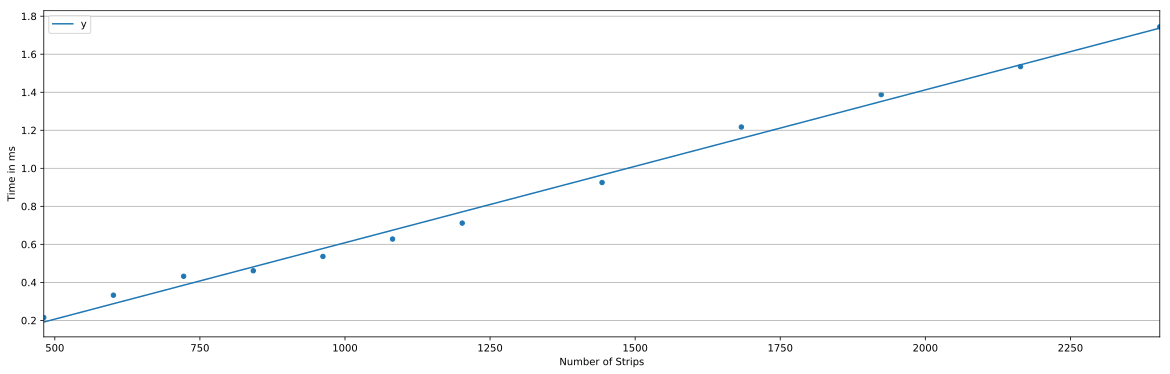

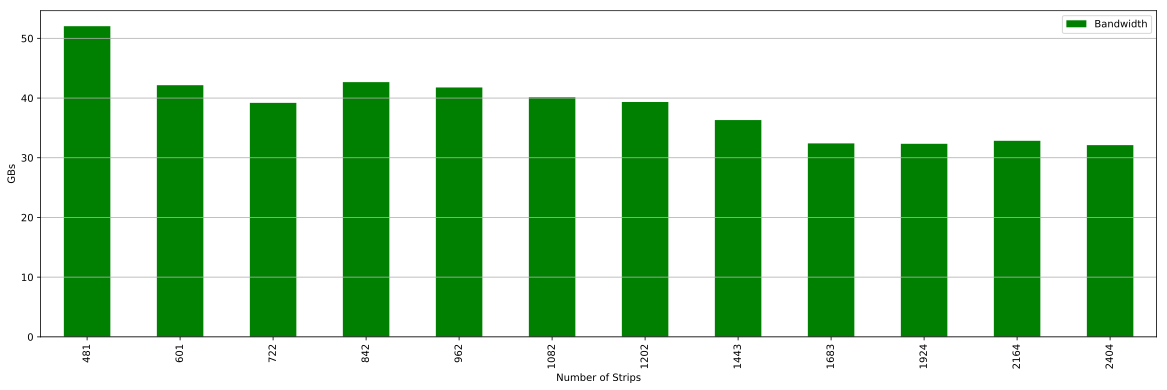

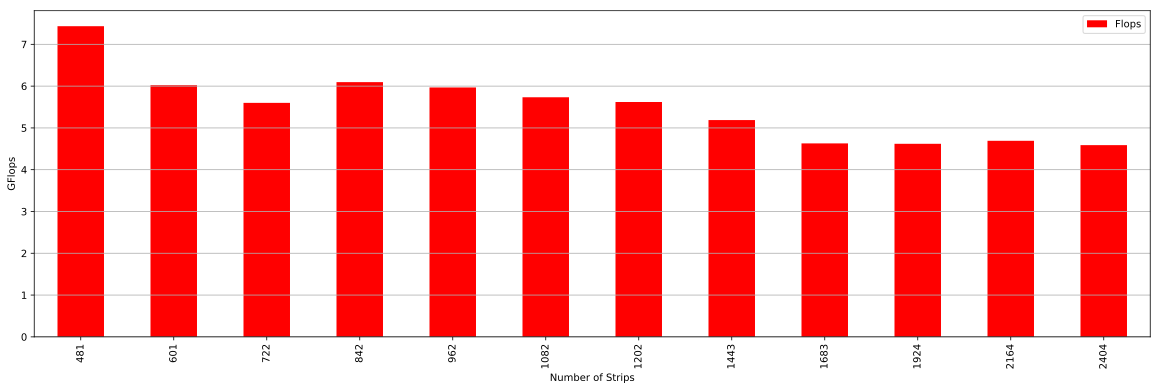

In [104]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_CUDA_SpMV_4NNZ_PER_ROW_4.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")

strips = []
for index, row in data.iterrows():
    strips.append(math.ceil(float(row['M'])/416))

data['Strips'] = strips

data = data[data["ValueType"] == 4]
data = data[data["Strips"] > 450]
# Synthesis Data
data = data[data["NonZeroPerRow"] == 4]
data = data.groupby('Strips').mean()
data = data.reset_index() 
data = data.sort_values(by=["Strips"])
data = data.reset_index(drop=True) 

#Linear Regression
reg_4 = LinearRegression()
reg_4.fit(data[["Strips"]], data[["AvgTime"]])
print('Coef: ', reg_4.coef_)
print('intercept: ', reg_4.intercept_)
print('CSR Equation 2: y = ', reg_4.intercept_[0], ' + ', reg_4.coef_[0][0], ' * x')
pr = reg_4.predict(data[["Strips"]])
x1 = data["Strips"].values
y1 = data['AvgTime'].values
A1 = np.array([x1, np.ones(len(x1))])
w,c = np.linalg.lstsq(A1.T,y1)[0]
yp = (w*x1 + c)
j=0
print('W: ', w, ' C: ', c)

f = plt.figure()
# ax = data.plot(kind="line", marker='o', x="Strips", y="AvgTime", figsize=(20,6))

ax = data.plot(kind='scatter', x="Strips", y="AvgTime", figsize=(20,6))
df = pd.DataFrame()
df['x'] = data["Strips"]
df['y'] = pr
df.plot(kind='line', x='x', y='y', ax=ax)
ax.set_ylabel("Time in ms")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="Strips", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="Strips", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')
# ax.scatter(rdata[['NonZeroPerRow']], rdata[["AvgTime"]])
pdf.close()
data

# CSR CUDA Model

Linear Regression for NZ per Row vs Time
Coef:  [[0.19809468]]
intercept:  [0.29030817]
CSR Equation 1: y =  0.29030817235546014  +  0.19809467557457963 * x
Linear Regression for Strips vs Time
Coef:  [[0.0008578]]
intercept:  [-0.25586888]
CSR Equation 2: y =  -0.2558688824870552  +  0.000857804299121641  * x


,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,ValueType,Strips,Prediction,Error
0,3.186670,479119,515905,0.322490,200,1526794,68.931083,9.500882,4,1152,0.917415,2.844789
1,3.809862,1447360,1447360,0.969333,200,5514242,80.251538,11.383347,4,3480,3.877129,3.999791
2,2.999340,21198119,21198119,16.215863,200,63580358,57.508457,7.841748,4,50958,52.247455,3.221997
3,14.734162,5363260,5363260,19.929251,200,79023142,49.735127,7.930368,4,12893,47.129267,2.364829
4,19.243892,5154859,5154859,10.616415,200,99199551,116.012198,18.687959,4,12392,57.852676,5.449361
5,76.281421,3072441,3072441,70.939763,200,234370166,39.991980,6.607583,4,7386,127.287520,1.794304
6,16.096433,18520486,18520486,41.208611,200,298113762,90.406573,14.468519,4,44521,179.396540,4.353375


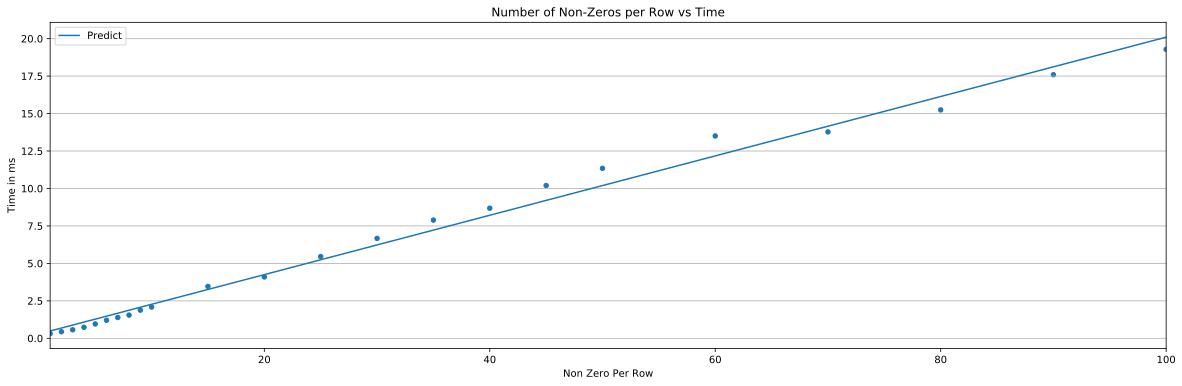

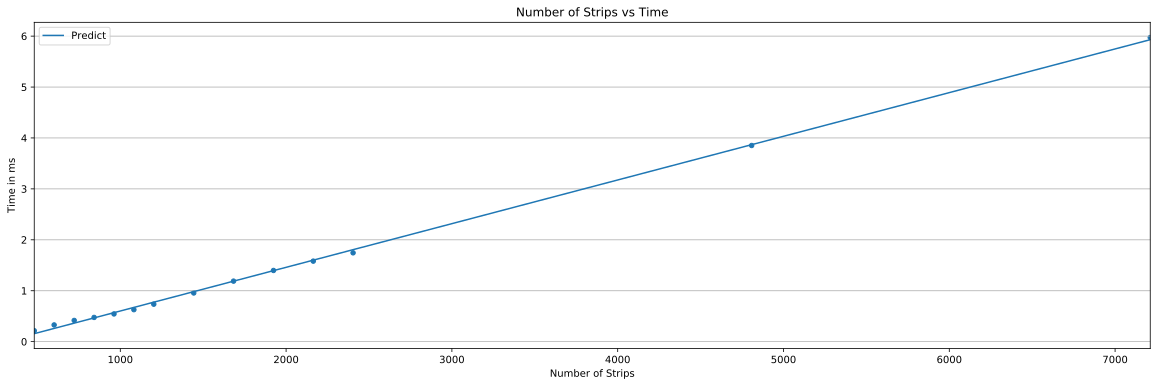

In [139]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_CUDA_Model_for_Floating_Point_4.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")

strips = []
for index, row in data.iterrows():
    strips.append(math.ceil(float(row['M'])/416))

data['Strips'] = strips

data = data[data["ValueType"] == 4]
data = data[data["Strips"] > 450]

# Synthesis Data To Model NNZ Per Row vs Time
nzData = data[data["M"] == 500000]
nzData = nzData[nzData["N"] == 1000000]
nzData = nzData.groupby('NonZeroPerRow').mean()
nzData = nzData.reset_index() 
nzData = nzData.sort_values(by=["NonZeroElements"])
nzData = nzData.reset_index(drop=True) 

# Synthesis Data To Model Strips vs Time
stData = data[data["NonZeroPerRow"] == 4]
stData = stData.groupby('Strips').mean()
stData = stData.reset_index() 
stData = stData.sort_values(by=["Strips"])
stData = stData.reset_index(drop=True) 


#Linear Regression for NZ per Row vs Time
nzModel = LinearRegression()
nzModel.fit(nzData[["NonZeroPerRow"]], nzData[["AvgTime"]])
print("Linear Regression for NZ per Row vs Time")
print('Coef: ', nzModel.coef_)
print('intercept: ', nzModel.intercept_)
print('CSR Equation 1: y = ', nzModel.intercept_[0], ' + ', nzModel.coef_[0][0], '* x')
nzPredict = nzModel.predict(nzData[["NonZeroPerRow"]])


#Linear Regression for Strips vs Time
stModel = LinearRegression()
stModel.fit(stData[["Strips"]], stData[["AvgTime"]])
print("Linear Regression for Strips vs Time")
print('Coef: ', stModel.coef_)
print('intercept: ', stModel.intercept_)
print('CSR Equation 2: y = ', stModel.intercept_[0], ' + ', stModel.coef_[0][0], ' * x')
stPredict = stModel.predict(stData[["Strips"]])


f = plt.figure()
ax = nzData.plot(kind="scatter", x="NonZeroPerRow", y="AvgTime", figsize=(20,6))
nzDf = pd.DataFrame()
nzDf['NonZeroPerRow'] = nzData["NonZeroPerRow"]
nzDf['Predict'] = nzPredict
nzDf.plot(kind='line', x='NonZeroPerRow', y='Predict', ax=ax)
ax.set_ylabel("Time in ms")
ax.set_xlabel("Non Zero Per Row")
ax.set_title("Number of Non-Zeros per Row vs Time")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')


f = plt.figure()
ax = stData.plot(kind='scatter', x="Strips", y="AvgTime", figsize=(20,6))
df = pd.DataFrame()
df['Strips'] = stData["Strips"]
df['Predict'] = stPredict
df.plot(kind='line', x='Strips', y='Predict', ax=ax)
ax.set_ylabel("Time in ms")
ax.set_xlabel("Number of Strips")
ax.set_title("Number of Strips vs Time")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')
pdf.close()

rdata = data[data["M"] != 500000]
# rdata = rdata[rdata["M"] > 70000]
rdata = rdata[rdata["N"] != 1000000]
rdata = rdata[rdata['NonZeroPerRow'] != 4]
rdata = rdata.groupby('NonZeroPerRow').mean()
rdata = rdata.reset_index() 
rdata = rdata.sort_values(by=["NonZeroElements"])
rdata = rdata.reset_index(drop=True) 
prediction = []
error = []
strips = []
y1 = nzModel.predict(rdata[['NonZeroPerRow']])
y3 = stModel.predict(rdata[['Strips']])
i=0
T2 = 0.735639
while i<len(y1):
    T0 = (y1[i]/T2) * y3[i]
    prediction.append(T0[0])
    i = i+1
    
rdata['Prediction'] = prediction
for index, row in rdata.iterrows():
    error.append(row['Prediction']/row['AvgTime'])
rdata['Error'] = error
rdata


In [140]:
y1

array([[ 0.92157053],
       [ 1.04502155],
       [ 0.88446146],
       [ 3.20906721],
       [ 4.10242071],
       [15.40125152],
       [ 3.47892585]])

In [141]:
y3

array([[ 0.73232167],
       [ 2.72929008],
       [43.45612259],
       [10.80380195],
       [10.37404199],
       [ 6.07987367],
       [37.93443632]])

In [142]:
stData

,Strips,M,N,AvgTime,TotalRun,NonZeroPerRow,NonZeroElements,Bandwidth,Flops,ValueType
0,481,200000,400000,0.214020,200,4.0,800000,52.341021,7.477286,4
1,601,250000,500000,0.327952,200,4.0,1000000,42.831205,6.118742,4
2,722,300000,600000,0.416104,200,4.0,1200000,40.639745,5.805677,4
3,842,350000,700000,0.475296,200,4.0,1400000,41.459410,5.922772,4
4,962,400000,800000,0.544008,200,4.0,1600000,41.247931,5.892560,4
5,1082,450000,900000,0.628031,200,4.0,1800000,40.125426,5.732203,4
6,1202,500000,1000000,0.735639,200,4.0,2000000,38.348891,5.478412,4
7,1443,600000,1200000,0.955753,200,4.0,2400000,35.314541,5.044934,4
8,1683,700000,1400000,1.188365,200,4.0,2800000,33.183974,4.740567,4
9,1924,800000,1600000,1.397757,200,4.0,3200000,32.186201,4.598028,4


In [143]:
nzData

,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,ValueType,Strips
0,1.0,500000,1000000,0.317179,200,500000,32.379019,3.237901,4,1202
1,2.0,500000,1000000,0.438501,200,1000000,37.020521,4.627564,4,1202
2,3.0,500000,1000000,0.566311,200,1500000,38.847903,5.297441,4,1202
3,4.0,500000,1000000,0.735639,200,2000000,38.348891,5.478412,4,1202
4,5.0,500000,1000000,0.957210,200,2500000,35.519901,5.223514,4,1202
5,6.0,500000,1000000,1.205888,200,3000000,33.332644,4.999897,4,1202
6,7.0,500000,1000000,1.389075,200,3500000,33.115566,5.039325,4,1202
7,8.0,500000,1000000,1.547951,200,4000000,33.656508,5.177924,4,1202
8,9.0,500000,1000000,1.877949,200,4500000,30.884764,4.792463,4,1202
9,10.0,500000,1000000,2.086744,200,5000000,30.674612,4.792908,4,1202
